Name : Gopal Kate

Orgnization : The Spark Foundation

Task 03: Exploratory Data Analysis - Retail

Problem Statement : Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ This task is about Exploratory Data Analysis - Retail where the task focuses on a business manager who will try to find out weak areas where he can work to make more profit and stability.

 Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

 Import the Dataset

In [3]:
df = pd.read_csv('SampleSuperstore.csv')  #Loading the Dataset
df.head()    #display the top 5 rows of Dataset

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 13)

In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Checking The null values

In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
df.duplicated().sum()

17

In [9]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [10]:
df['Postal Code'] = df['Postal Code'].astype('object')

In [11]:
df.drop_duplicates(subset=None,keep='first',inplace=True)
df.duplicated().sum()

0

<AxesSubplot: >

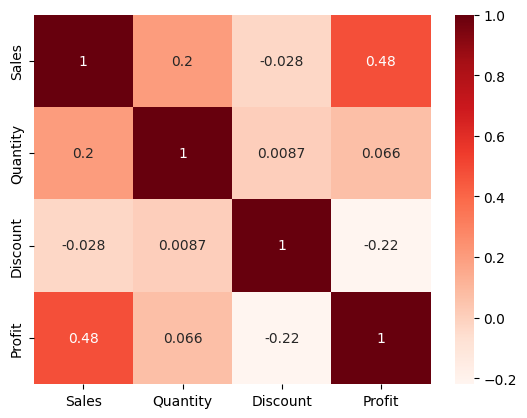

In [12]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='Reds')


Droping the postal code columns

In [13]:
df = df.drop(['Postal Code'],axis = 1)

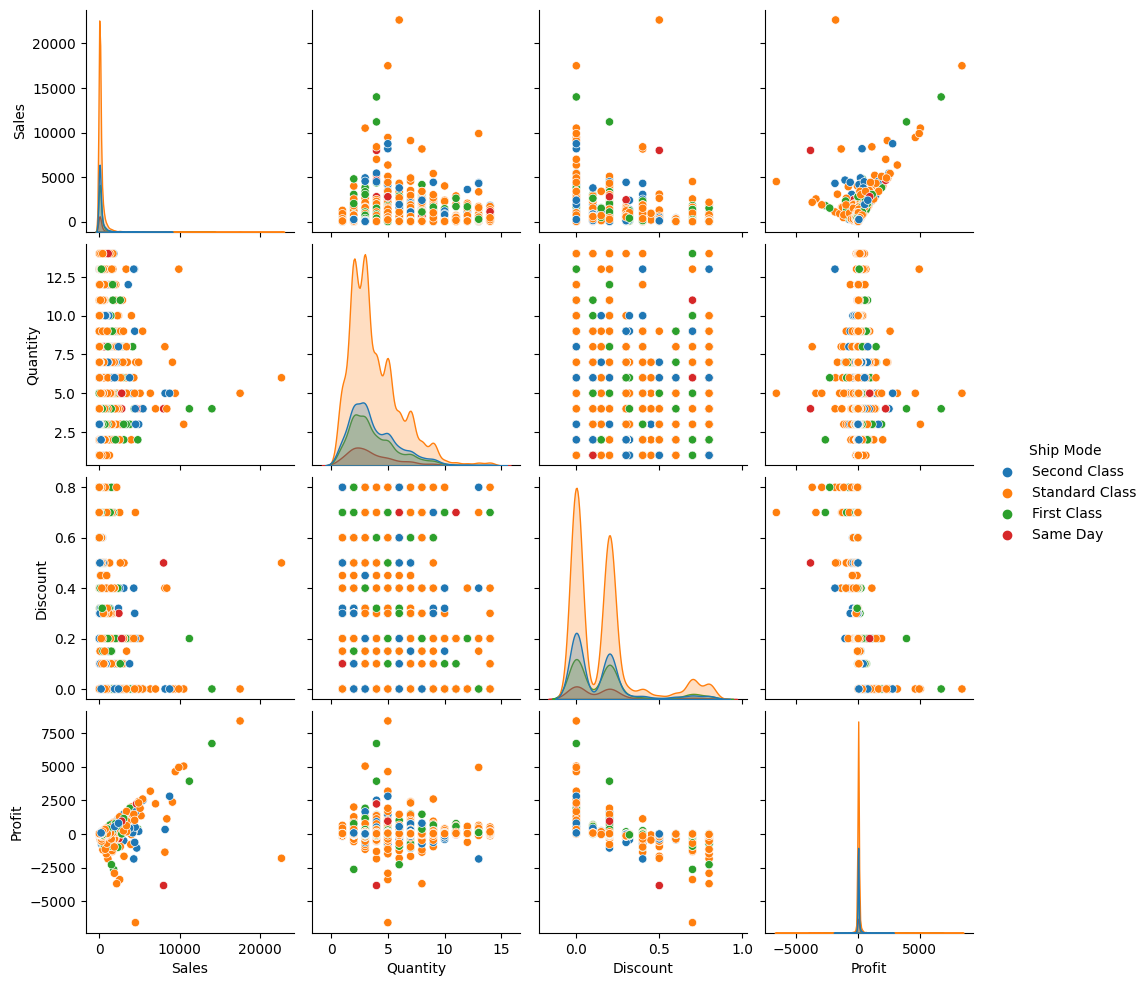

In [14]:
sns.pairplot(df, hue = 'Ship Mode')

In [15]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

<AxesSubplot: xlabel='Ship Mode', ylabel='count'>

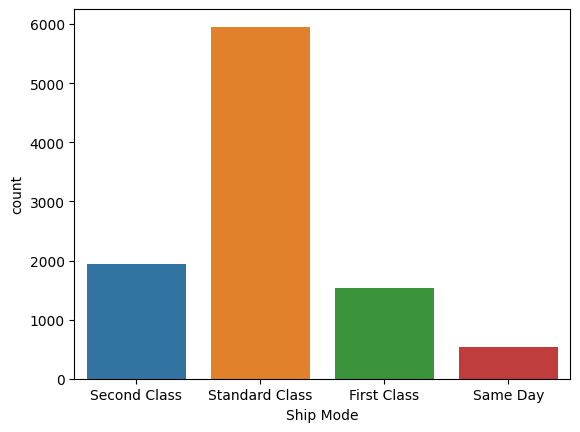

In [16]:
sns.countplot(x=df['Ship Mode'])

Value counts for segments

In [17]:
df['Segment'].value_counts()     

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

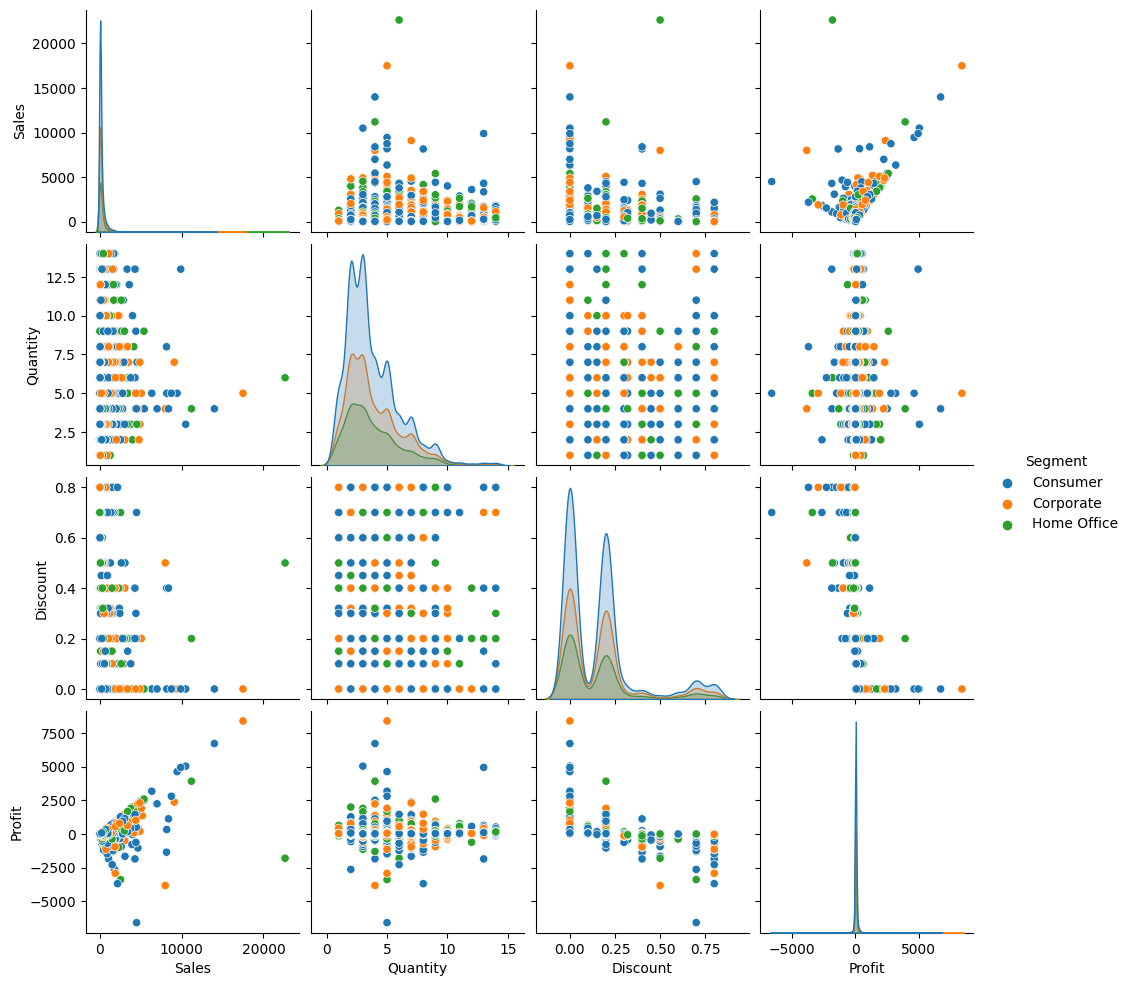

In [18]:
# Plotting the pairplot

sns.pairplot(df,hue = 'Segment') 

<AxesSubplot: xlabel='Segment', ylabel='count'>

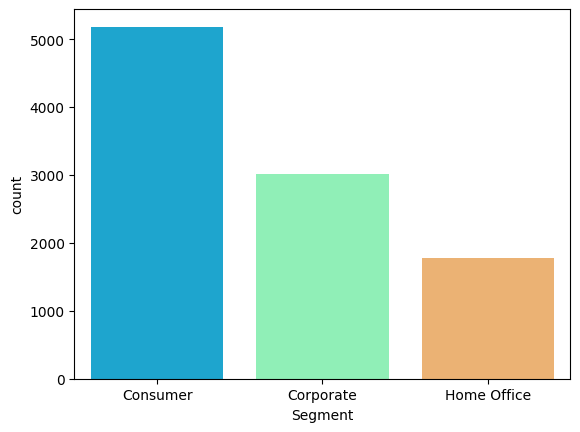

In [19]:
sns.countplot(x = 'Segment',data = df, palette = 'rainbow')


In [20]:
df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

<AxesSubplot: xlabel='Category', ylabel='count'>

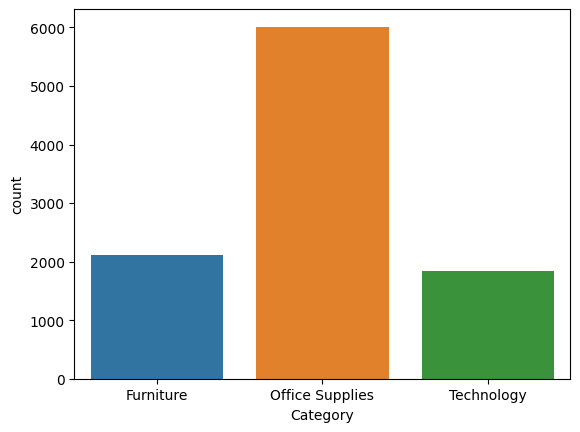

In [21]:
sns.countplot(x='Category',data=df,palette='tab10')

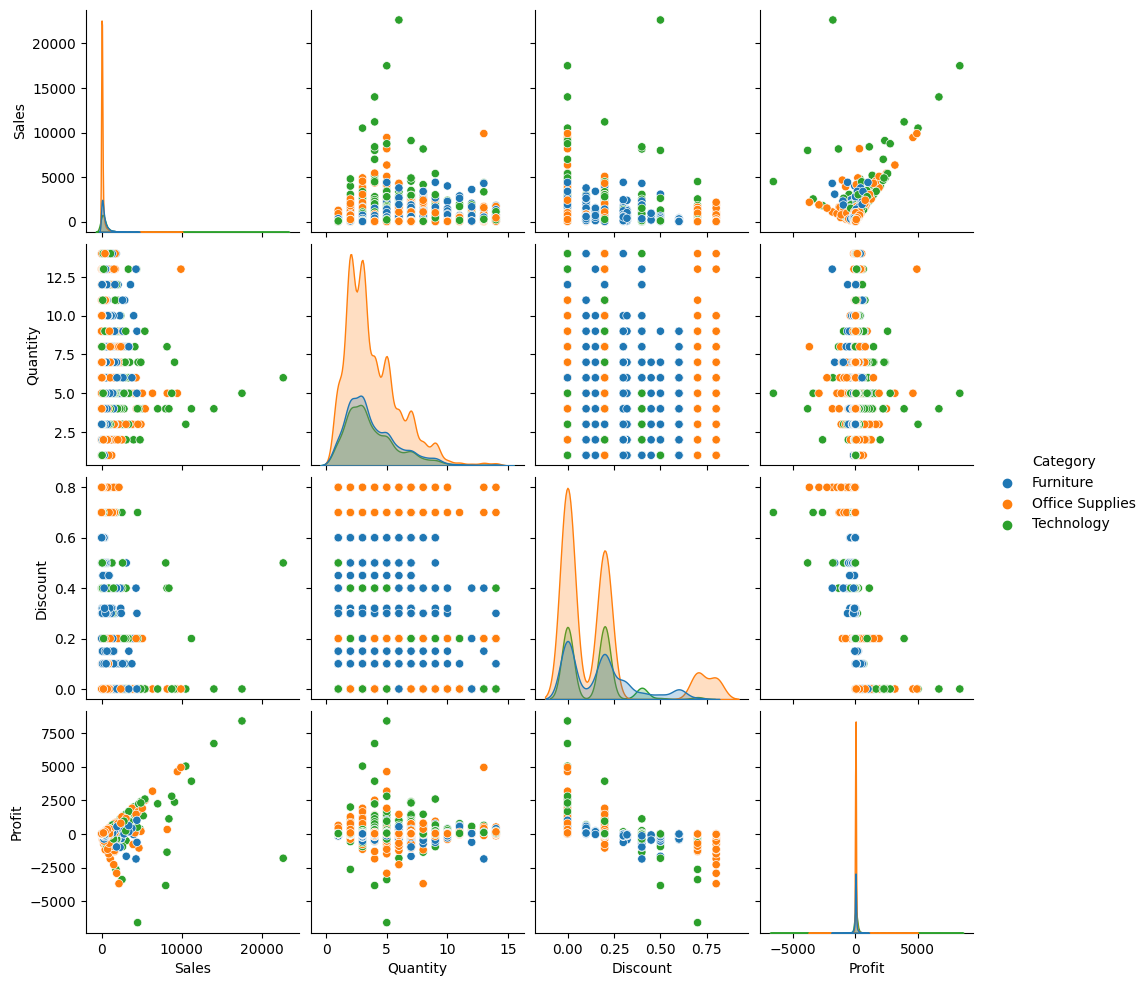

In [22]:
sns.pairplot(df,hue='Category')

In [23]:
df['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

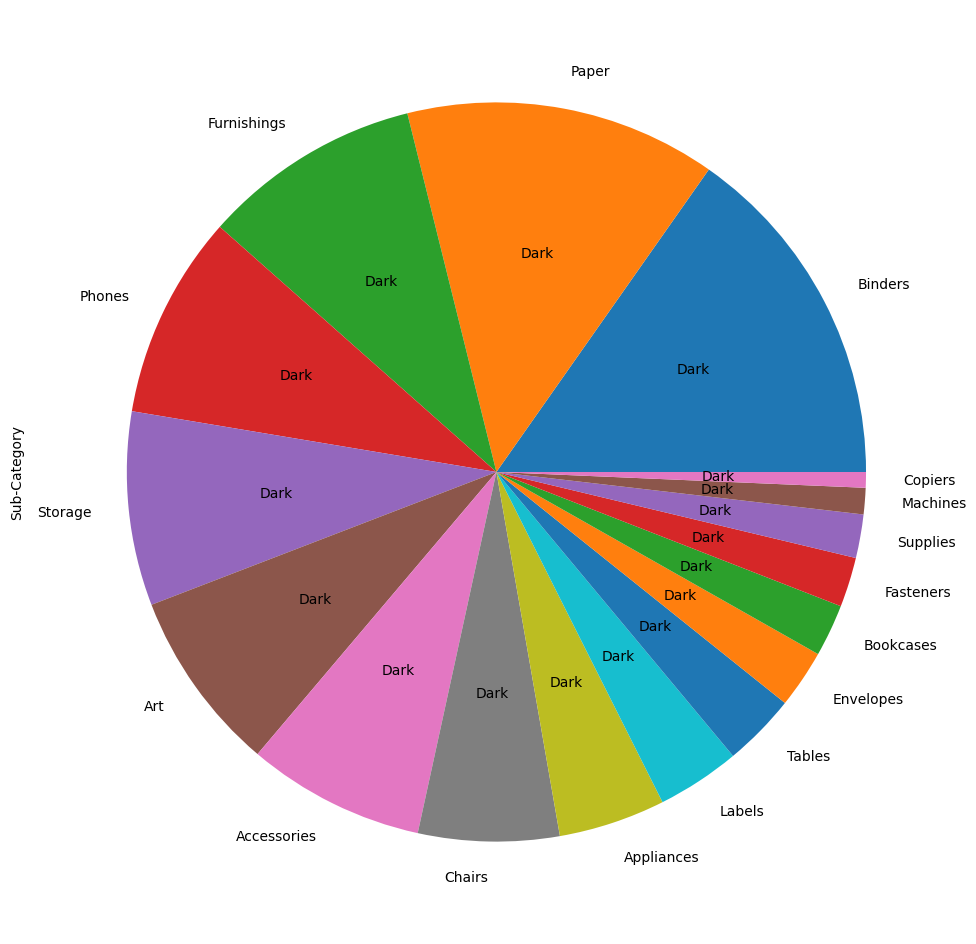

In [24]:
plt.figure(figsize=(15,12))
df['Sub-Category'].value_counts().plot.pie(autopct='Dark')
plt.show()

Observstion No 01

Maximum are from Binders, Paper, furnishings, Phones, storage, art, accessories and Minimum from copiers, machines, suppliers

In [26]:
df['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

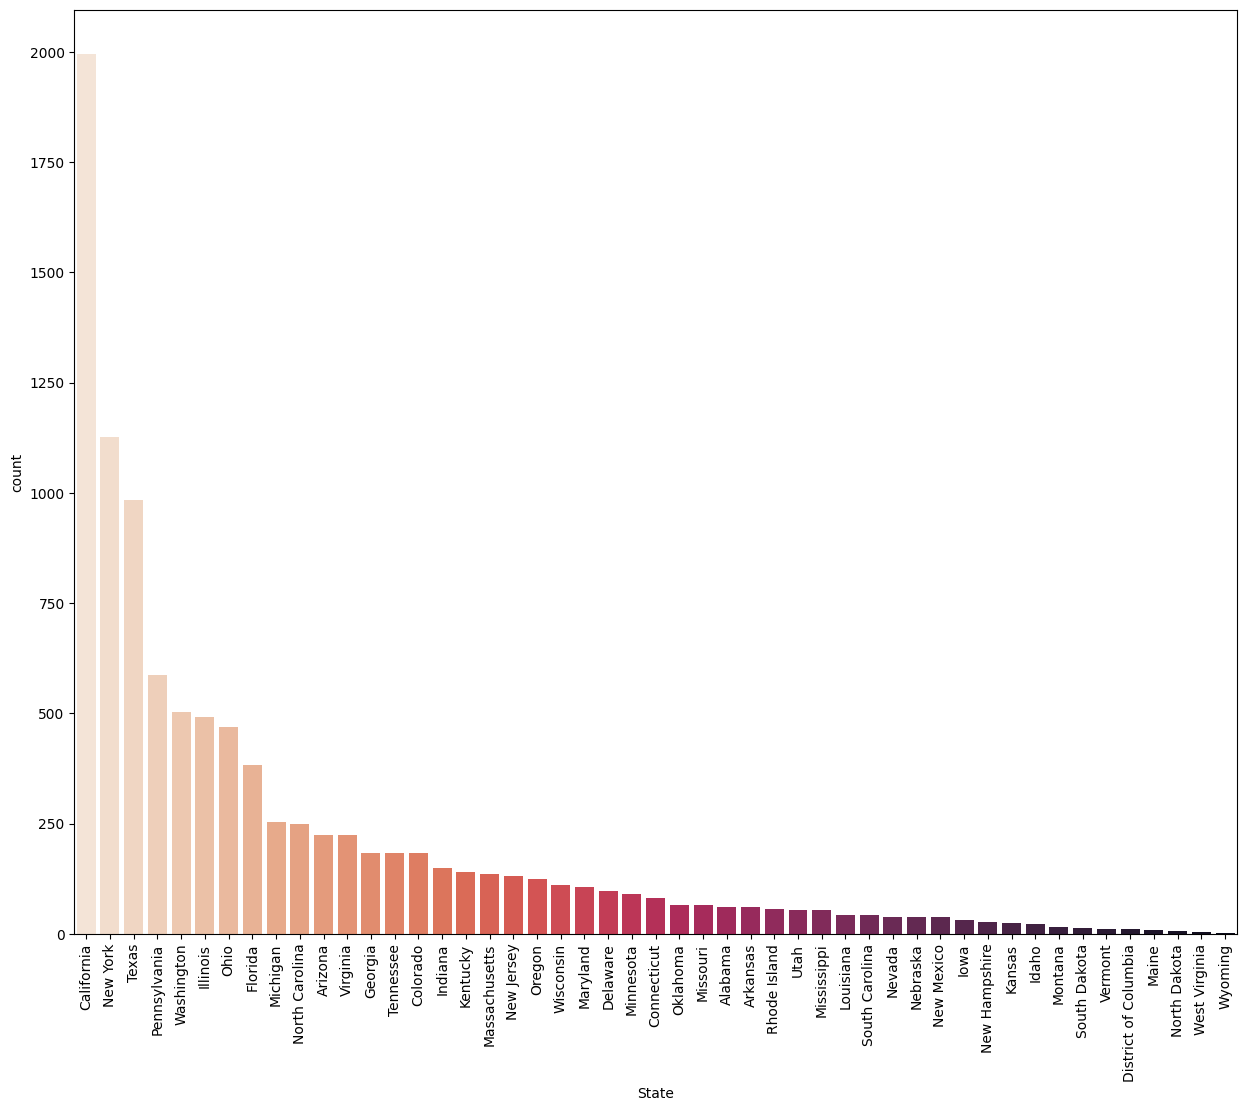

In [27]:
plt.figure(figsize=(15,12))
sns.countplot(x='State',data=df,palette='rocket_r',order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Observation No 02

Highest number of buyers are from California and New York City

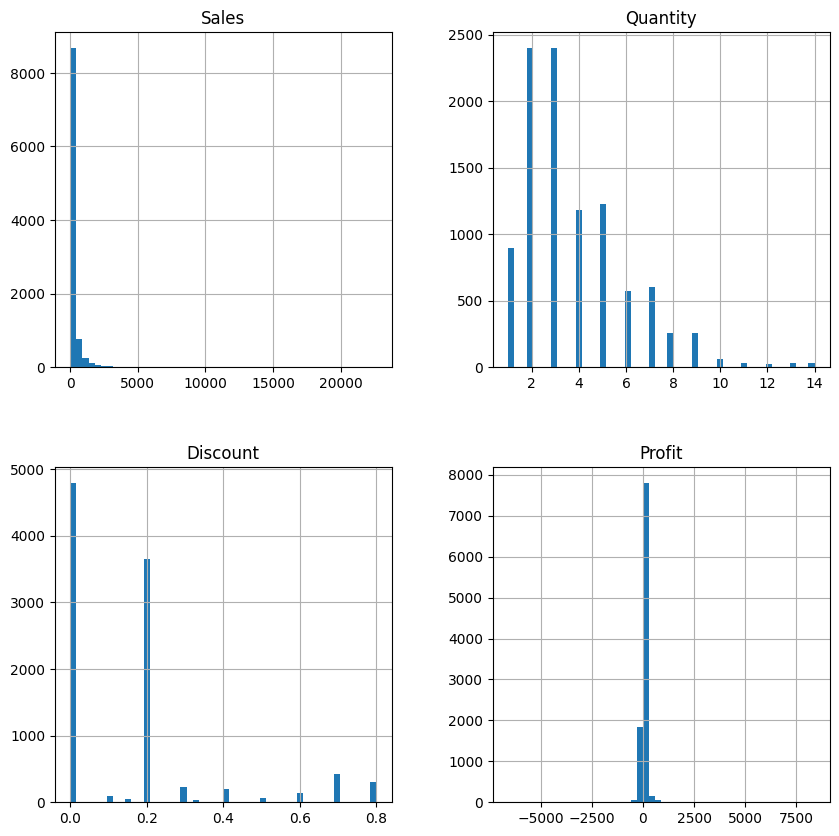

In [28]:
df.hist(figsize=(10,10),bins=50)
plt.show()


Observaation No 03

1) Most customers tends to buy quantity of 2 and 3
2) Discount give maximum is 0 to 20 percent

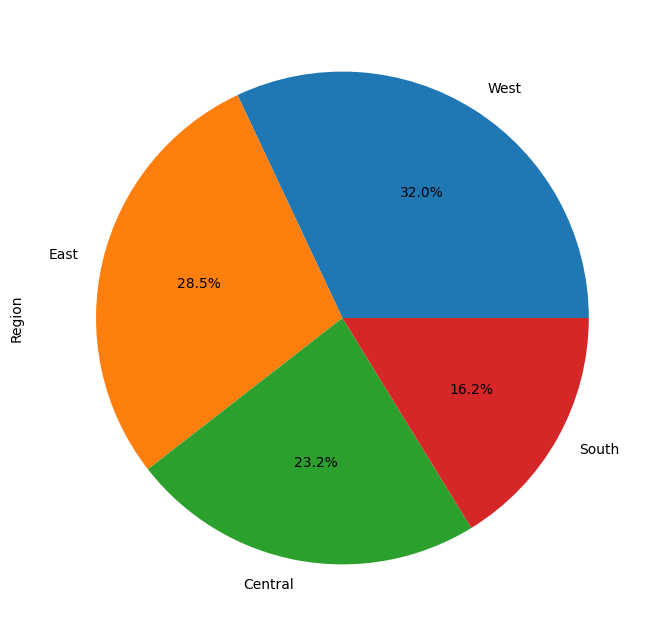

In [29]:
plt.figure(figsize=(10,8))
df['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

Profit Vs Discount on Chart

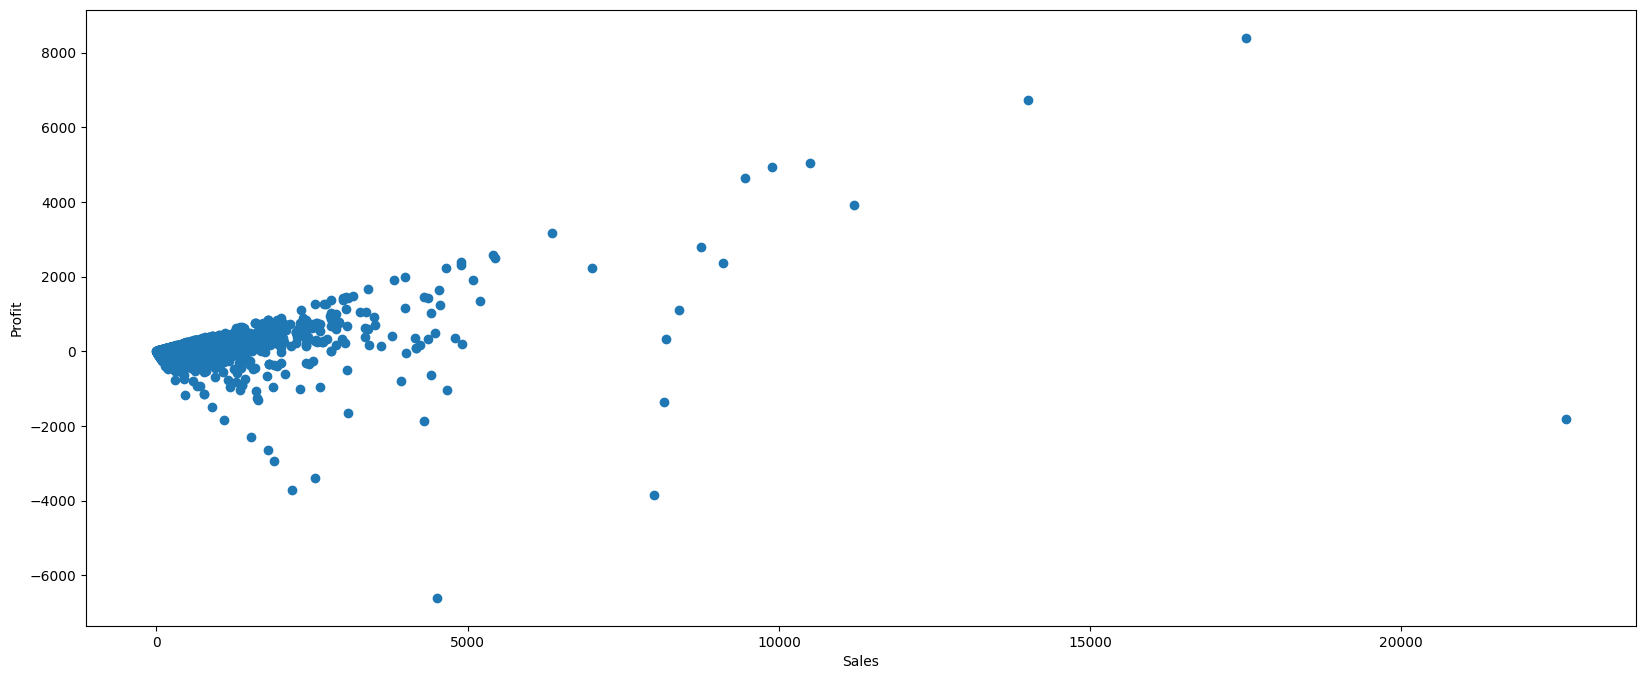

In [30]:
fig,ax=plt.subplots(figsize=(20,8))
ax.scatter(df['Sales'],df['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

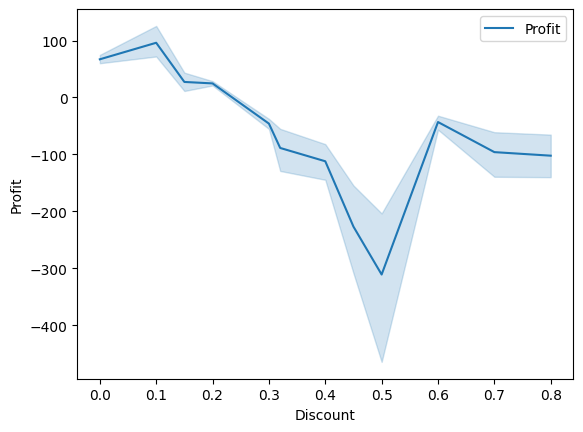

In [31]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()

Observation No 04

1) No Correlation between profit and discount

Profit Vs Quantity On Chart

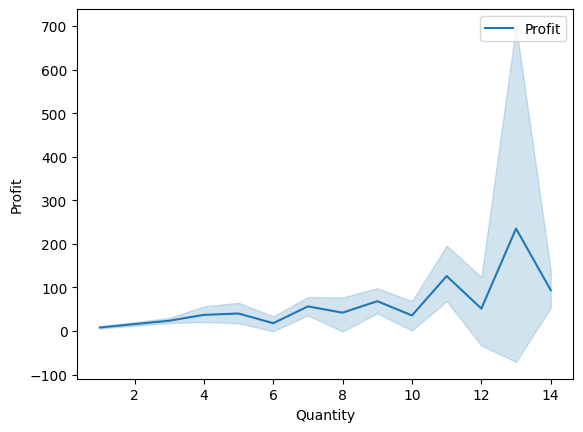

In [33]:
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=df)
plt.legend()
plt.show()

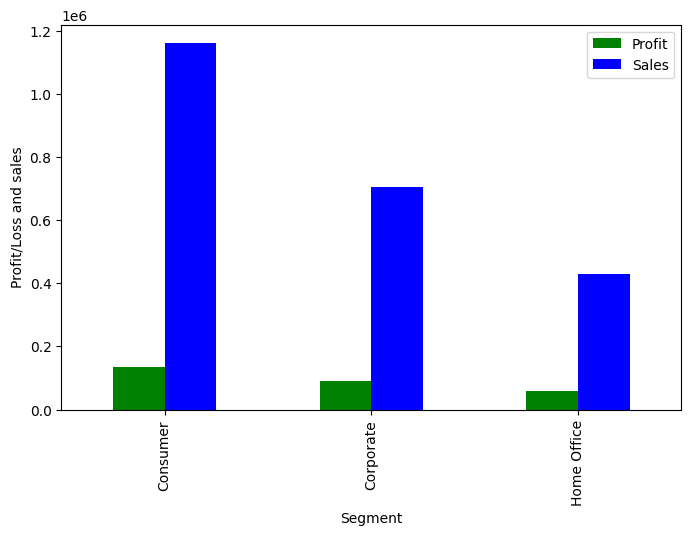

In [35]:
df.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['green','blue'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()


Observation No 05

1) Profit and sales are maximum in consumer segment and minimum in Home office segment.


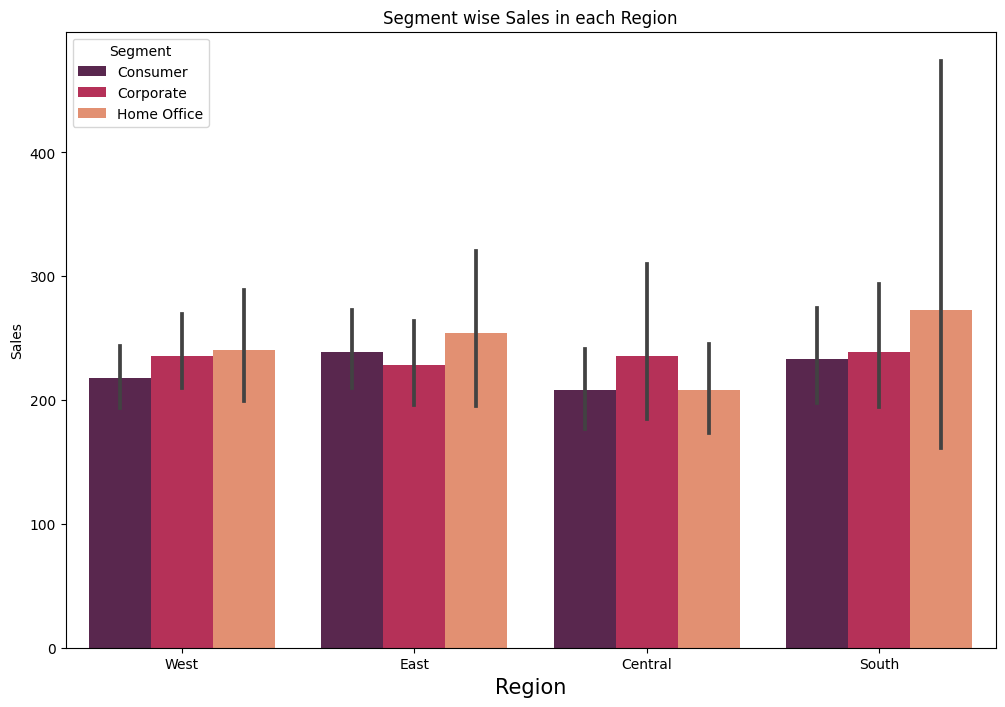

In [36]:
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',data=df,hue='Segment',order=df['Region'].value_counts().index,palette='rocket')
plt.xlabel('Region',fontsize=15)
plt.show()

Observation No 06

1) Segment wise sales are almost same in every region

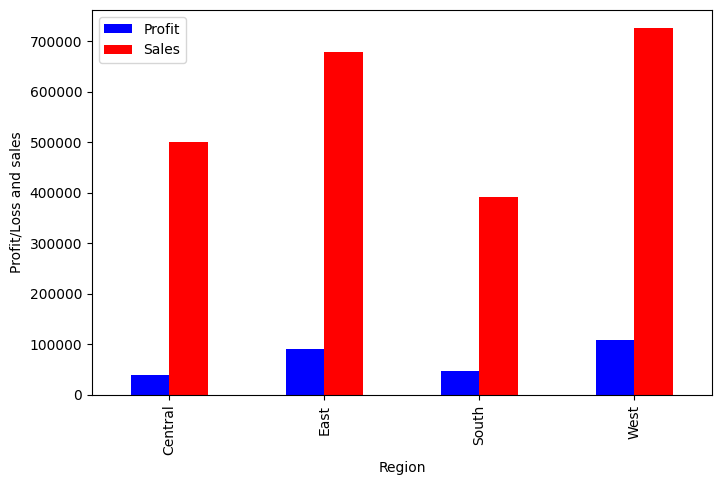

In [37]:
df.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['blue','red'],figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

Observation No 07

1) Profit and sales are maximum in west region and minimum in south region

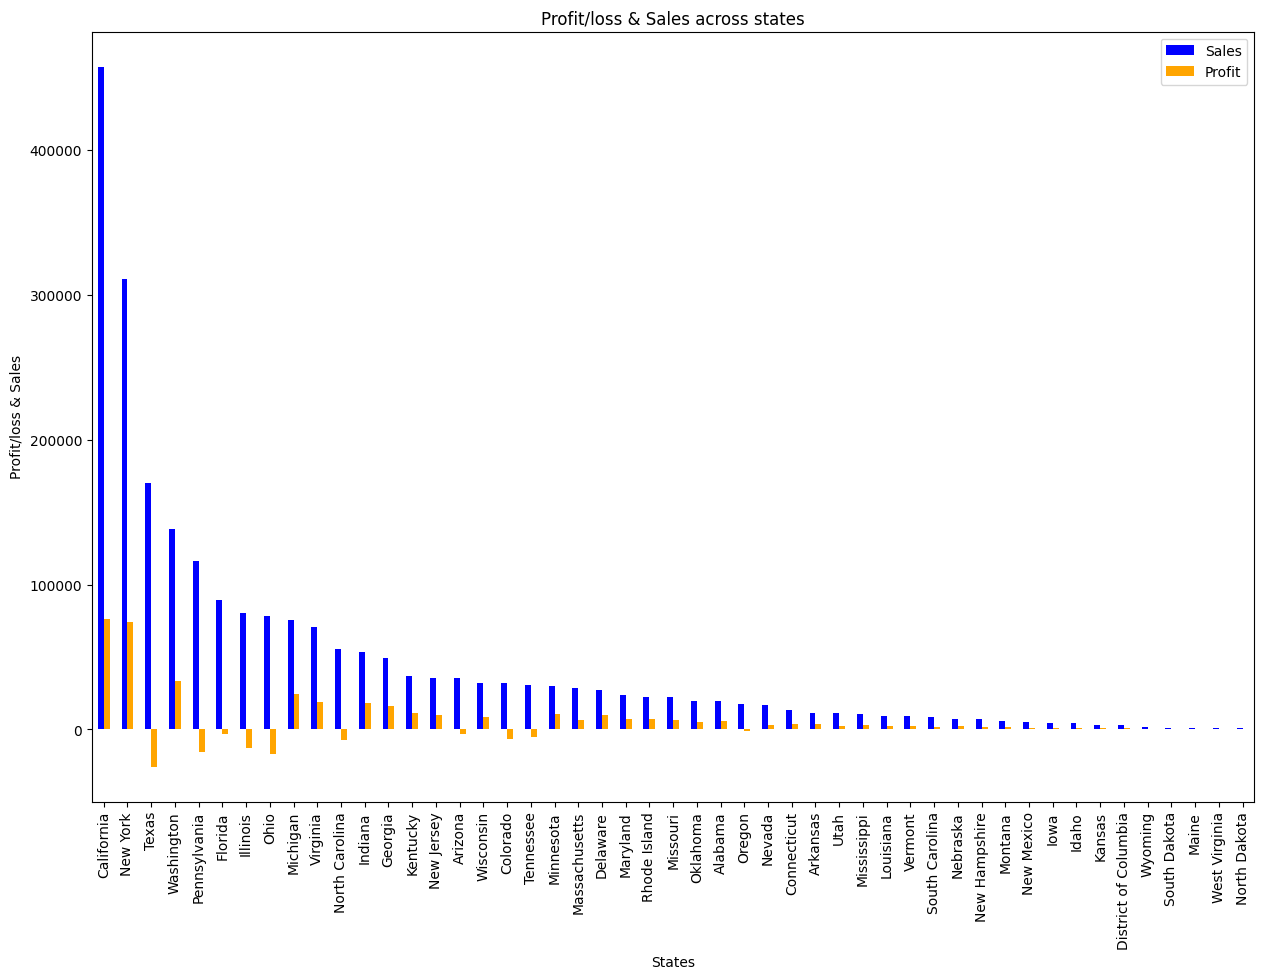

In [39]:
ps = df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['blue','orange'],figsize=(15,10))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()

Observation No 08

1) High profit is for california, New york
2) Loss is for texas, pennsylvania, Ohio

In [40]:
t_states = df['State'].value_counts().nlargest(10)
t_states

California        1996
New York          1127
Texas              983
Pennsylvania       586
Washington         502
Illinois           491
Ohio               468
Florida            383
Michigan           254
North Carolina     249
Name: State, dtype: int64

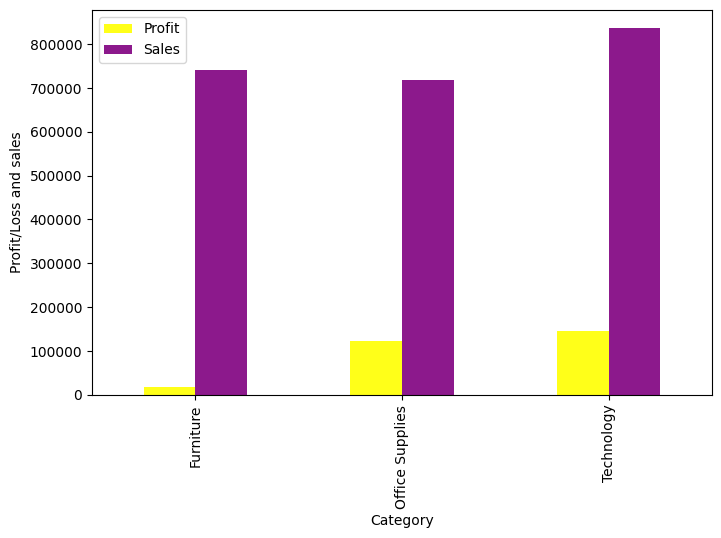

In [41]:
df.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['yellow','purple'],alpha=0.9,figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

Observation No 09

As a business manager, try to find out the weak areas where you can work to make more profit?

1) Technology and Office Supplies have high profit.
2) Furniture have less profit.

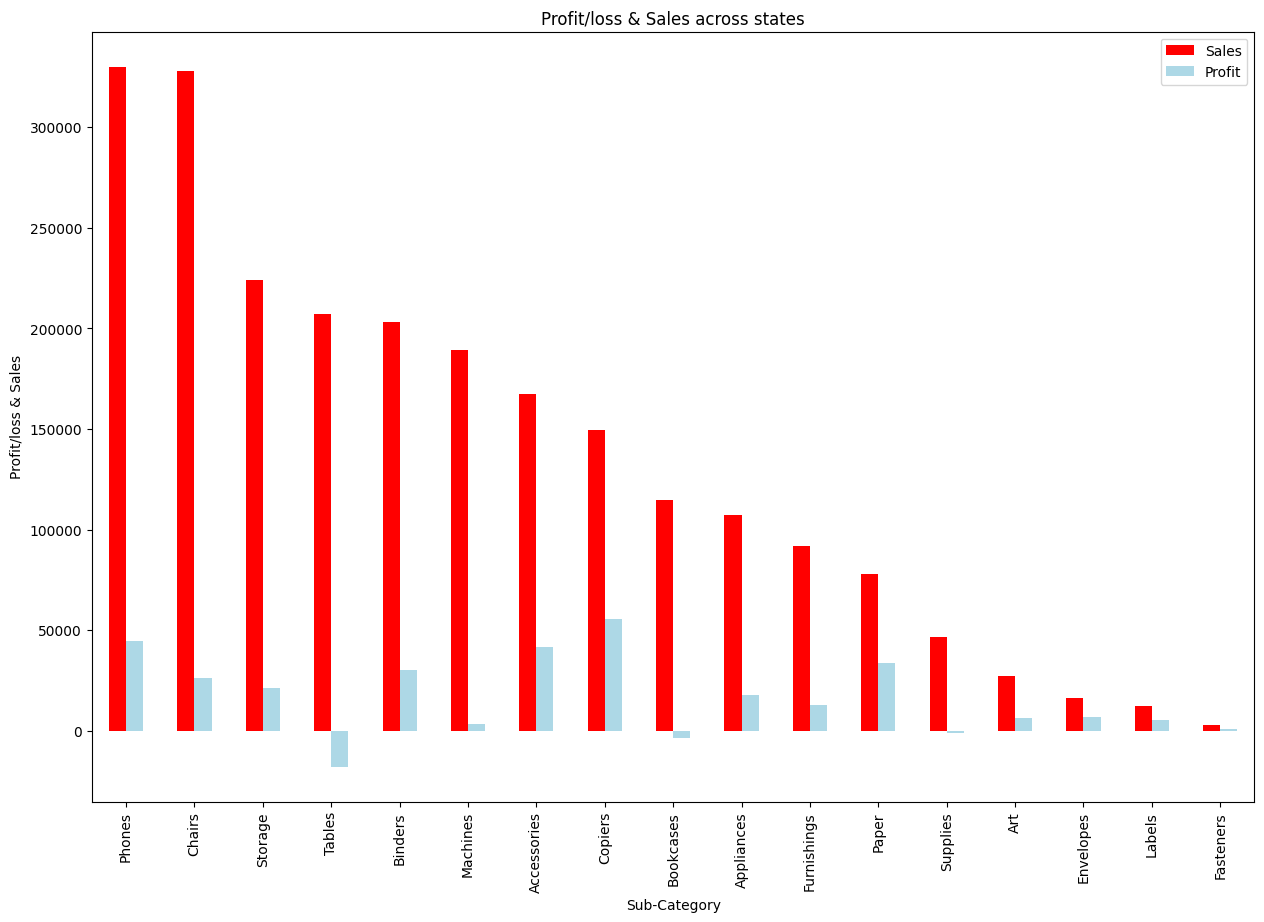

In [43]:
ps = df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['red','lightblue'],figsize=(15,10))
plt.title('Profit/loss & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss & Sales')
plt.show()

Observation No 10

1) Phones sub-category have high sales.
2) chairs have high sales but less profit compared to phones
3) Tables and Bookmarks sub-categories facing huge loss

Thank you , The Task is Complete !